---

**APRP: 1. Introduction to Probabilistic Graphical Models**

---


**Contents**
--------
1. What is machine learning
2. Different ways of learning from data
3. Why probabilistic graphical models
4. Major types of PGMs

### 1. Setting up the enviroment
Loading common Libraries.


In [112]:
from IPython.display import Image
import numpy as np
import pandas as pd

### 2. Loading and testing the Iris dataset

We can take an example of predicting the type of flower based on the sepal length and width of the flower. Let's say we have some data (discretized iris data set on sepal length and width). The dataset looks something like this:

In [113]:
from sklearn.datasets import load_iris

iris = load_iris()
mini_iris = np.round(iris.data[:, :2]).astype(int)
data = pd.DataFrame(mini_iris, columns=['length', 'width'])
data['type'] = iris.target

#Shuffle data
data = data.iloc[np.random.permutation(len(data))]
data

,length,width,type
131,8,4,2
1,5,3,0
143,7,3,2
127,6,3,2
145,7,3,2
...,...,...,...
43,5,4,0
114,6,3,2
19,5,4,0
9,5,3,0


### 2. Different ways of learning from data

Now let's say we want to predict the type of flower for a new given data point. There are multiple ways to solve this problem. We will consider these two ways in some detail:  

1. We could find a function which can directly map an input value to it's class label.
2. We can find the probability distributions over the variables and then use this distribution to answer queries about the new data point.

There are a lot of algorithms for finding a mapping function. For example linear regression tries to find a linear equation which explains the data. Support vector machine tries to find a plane which separates the data points. Decision Tree tries to find a set of simple greater than and less than equations to classify the data. Let's try to apply Decision Tree on this data set.

We can plot the data and it looks something like this:

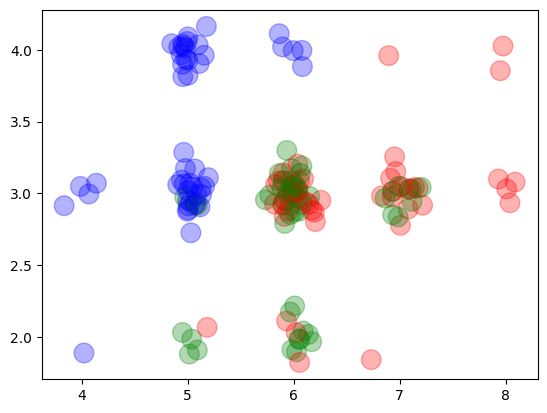

In [114]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Adding a little bit of noise so that it's easier to visualize
data_with_noise = data.iloc[:, :2] + np.random.normal(loc=0, scale=0.1, size=(150, 2))
plt.scatter(data_with_noise.length, data_with_noise.width, c=[ "bgr"[k] for k in data.iloc[:,2] ], s=200, alpha=0.3)

In the plot we can easily see that the blue points are concentrated on the top-left corner, green ones in bottom left and red ones in top right.

Now let's try to train a Decision Tree on this data.

In [115]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[['length', 'width']].values, data.type.values, test_size=0.2)

classifier = DecisionTreeClassifier(max_depth=4)
classifier.fit(X_train, y_train)
classifier.predict(X_test)

array([2, 1, 1, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0, 0, 2, 0, 2, 2, 2, 0, 1, 0,
       0, 0, 2, 1, 2, 2, 1, 1])

In [116]:
classifier.score(X_test, y_test)

0.7666666666666667

So, in this case we got a classification accuracy of 60 %.

Now moving on to our second approach using a probabilistic model.
The most obvious way to do this classification task would be to compute a Joint Probability Distribution over all these variables and then marginalize and reduce over these according to our new data point to get the probabilities of classes.

In [117]:
X_train, X_test = data[:120], data[120:]

In [118]:
X_train

,length,width,type
131,8,4,2
1,5,3,0
143,7,3,2
127,6,3,2
145,7,3,2
...,...,...,...
12,5,3,0
58,7,3,1
48,5,4,0
136,6,3,2


In [119]:
# Computing the joint probability distribution over the training data
joint_prob = X_train.groupby(['length', 'width', 'type']).size() / 120
joint_prob

length  width  type
4       2      0       0.008333
        3      0       0.016667
5       2      1       0.025000
               2       0.008333
        3      0       0.158333
               1       0.008333
        4      0       0.100000
6       2      1       0.058333
               2       0.016667
        3      1       0.158333
               2       0.183333
        4      0       0.041667
7       2      2       0.008333
        3      1       0.041667
               2       0.108333
        4      2       0.008333
8       3      2       0.033333
        4      2       0.016667
dtype: float64

In [120]:
# Predicting values

# Selecting just the feature variables.
X_test_features = X_test.iloc[:, :2].values
X_test_actual_results = X_test.iloc[:, 2].values

#%TODO%

predicted_values = [joint_prob.loc[(length, width)].idxmax() for length, width in X_test_features]

# Comparing results with the actual data.
print(predicted_values)
predicted_values == X_test_actual_results
#array([ True,  True, False,  True, False, False,  True,  True, False,
#       False,  True,  True,  True,  True,  True, False,  True,  True,
#        True,  True,  True,  True,  True,  True,  True,  True,  True,
#       False,  True,  True])


[0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 2, 0, 1, 1, 2, 2, 0, 2, 0, 0, 2]


array([False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False, False, False,
        True, False,  True, False,  True, False, False,  True,  True,
        True,  True,  True])

In [121]:
score = (predicted_values == X_test_actual_results).sum() / 30
print(score)

0.5666666666666667


### 4. Test ONE of the following datasets %TODO%

- Titanic Survival Dataset;
- Soybean Disease; More info: https://archive-beta.ics.uci.edu/dataset/91/soybean+small


In [122]:
titanic = pd.read_csv("/content/titanic.csv")

df_titanic = pd.DataFrame(titanic, columns = ["Survived", "Pclass", "Sex", "Age"])
df_titanic["Sex"] = df_titanic["Sex"].replace({"male": 0, "female": 1})

mean_age = round(df_titanic["Age"].mean())
df_titanic["Age"].fillna(value=mean_age, inplace= True)
print(df_titanic)

df_survived = pd.DataFrame(titanic, columns = ["Survived"])

     Survived  Pclass  Sex   Age
0           0       3    0  22.0
1           1       1    1  38.0
2           1       3    1  26.0
3           1       1    1  35.0
4           0       3    0  35.0
..        ...     ...  ...   ...
886         0       2    0  27.0
887         1       1    1  19.0
888         0       3    1  30.0
889         1       1    0  26.0
890         0       3    0  32.0

[891 rows x 4 columns]


In [123]:
X_train, X_test, y_train, y_test = train_test_split(df_titanic[['Pclass', 'Sex', 'Age']].values, df_survived, test_size=0.2)

classifier = DecisionTreeClassifier(max_depth=4)
classifier.fit(X_train, y_train)
classifier.predict(X_test)

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0])

In [124]:
classifier.score(X_test, y_test)

0.7877094972067039

In [125]:
X_train, X_test = df_titanic[:120], df_titanic[120:]

In [126]:
X_train

,Survived,Pclass,Sex,Age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0
...,...,...,...,...
115,0,3,0,21.0
116,0,3,0,70.5
117,0,2,0,29.0
118,0,1,0,24.0


In [127]:
joint_prob = X_train.groupby(['Pclass', 'Sex', 'Age', 'Survived']).size() / 624
joint_prob

Pclass  Sex  Age   Survived
1       0    19.0  0           0.001603
             21.0  0           0.001603
             23.0  1           0.001603
             24.0  0           0.001603
             28.0  0           0.003205
                                 ...   
3       1    30.0  1           0.011218
             31.0  0           0.001603
             33.0  1           0.001603
             38.0  1           0.001603
             40.0  0           0.001603
Length: 88, dtype: float64

In [128]:
X_test_features = X_test.iloc[:, 1:].values
X_test_actual_results = X_test.iloc[:, 0].values

print(X_test_features)
print(X_test_actual_results)
#predicted_values = [joint_prob.loc[(Pclass, Sex, Age)].idxmax() for Pclass, Sex, Age in X_test_features]

predicted_values = []
# Comparing results with the actual data.
for i in X_test_features:
  Pclass, Age, Sex = i
  try:
    predicted_value = joint_prob.loc[Pclass, Age, Sex].idxmax() # maior id
    predicted_values.append(predicted_value)
  except KeyError:
        predicted_values.append(np.nan)

predicted_values == X_test_actual_results

[[ 2.   0.  21. ]
 [ 3.   0.  30. ]
 [ 2.   0.  32.5]
 ...
 [ 3.   1.  30. ]
 [ 1.   0.  26. ]
 [ 3.   0.  32. ]]
[0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1
 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1
 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1
 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0
 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1
 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0
 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0
 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0
 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1
 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 

array([ True,  True, False, False,  True, False,  True, False,  True,
       False,  True,  True, False,  True, False, False, False, False,
        True,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True,  True,  True, False, False,  True, False, False,
       False,  True, False,  True,  True, False,  True, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False,  True,  True,  True, False, False, False, False, False,
        True, False, False,  True,  True, False,  True, False,  True,
        True, False, False, False,  True, False, False, False, False,
        True, False,  True, False,  True, False,  True, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True, False,
       False, False,

In [129]:
score = (predicted_values == X_test_actual_results).sum() / 30
print(score)

9.466666666666667


### 5. Implement a Naive Bayes classifier from scratch

The next challenge is to implement the Naive Bayes algorithm from scratch in Python (without libraries).





In [130]:
# Make Predictions with Naive Bayes On The Iris Dataset
from csv import reader
from math import sqrt
from math import exp
from math import pi

# Load a CSV file
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset

# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())

# Convert string column to integer
def str_column_to_int(dataset, column):
	class_values = [row[column] for row in dataset]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
		print('[%s] => %d' % (value, i))
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup

# Split the dataset by class values, returns a dictionary
def separate_by_class(dataset):
	separated = dict()
	for i in range(len(dataset)):
		vector = dataset[i]
		class_value = vector[-1]
		if (class_value not in separated):
			separated[class_value] = list()
		separated[class_value].append(vector)
	return separated

# Calculate the mean of a list of numbers
def mean(numbers):
	return sum(numbers)/float(len(numbers))

# Calculate the standard deviation of a list of numbers
def stdev(numbers):
	avg = mean(numbers)
	variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
	return sqrt(variance)

# Calculate the mean, stdev and count for each column in a dataset
def summarize_dataset(dataset):
	summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
	del(summaries[-1])
	return summaries

# Split dataset by class then calculate statistics for each row
def summarize_by_class(dataset):
	separated = separate_by_class(dataset)
	summaries = dict()
	for class_value, rows in separated.items():
		summaries[class_value] = summarize_dataset(rows)
	return summaries

# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
	exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
	return (1 / (sqrt(2 * pi) * stdev)) * exponent

# Calculate the probabilities of predicting each class for a given row
def calculate_class_probabilities(summaries, row):
    probabilities = {}
    for class_value, class_summaries in summaries.items():
        probabilities[class_value] = 1
        for i in range(len(class_summaries)):
            mean, stdev, _ = class_summaries[i]
            x = row[i]
            probabilities[class_value] *= calculate_probability(x, mean, stdev)
    return probabilities

# Predict the class for a given row
def predict(summaries, row):
	probabilities = calculate_class_probabilities(summaries, row)
	best_label, best_prob = None, -1
	for class_value, probability in probabilities.items():
		if best_label is None or probability > best_prob:
			best_prob = probability
			best_label = class_value
	return best_label

# Make a prediction with Naive Bayes on Iris Dataset
filename = '/content/iris.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])-1):
	str_column_to_float(dataset, i)
# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)
# fit model
model = summarize_by_class(dataset)
# define a new record
row = [5.7,2.9,4.2,1.3]
# predict the label
label = predict(model, row)
print('Data=%s, Predicted: %s' % (row, label))

[Iris-virginica] => 0
[Iris-versicolor] => 1
[Iris-setosa] => 2
Data=[5.7, 2.9, 4.2, 1.3], Predicted: 1


### 6. Test the following datasets %TODO%

- Titanic Survival Dataset;
- Soybean Disease;


In [132]:
# Make Predictions with Naive Bayes On The Titanic Dataset
from csv import reader
from math import sqrt
from math import exp
from math import pi

# Split the dataset by class values, returns a dictionary
def separate_by_class(dataset):
	separated = dict()
	for i in range(len(dataset)):
		vector= dataset.iloc[i].tolist()
		class_value = vector[-1]
		if (class_value not in separated):
			separated[class_value] = list()
		separated[class_value].append(vector)
	return separated

# Calculate the mean of a list of numbers
def mean(numbers):
	return sum(numbers)/float(len(numbers))

# Calculate the standard deviation of a list of numbers
def stdev(numbers):
	avg = mean(numbers)
	variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
	return sqrt(variance)

# Calculate the mean, stdev and count for each column in a dataset
def summarize_dataset(dataset):
	summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
	del(summaries[-1])
	return summaries

# Split dataset by class then calculate statistics for each row
def summarize_by_class(dataset):
	separated = separate_by_class(dataset)
	summaries = dict()
	for class_value, rows in separated.items():
		summaries[class_value] = summarize_dataset(rows)
	return summaries

# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
	exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
	return (1 / (sqrt(2 * pi) * stdev)) * exponent

# Calculate the probabilities of predicting each class for a given row
def calculate_class_probabilities(summaries, row):
    probabilities = {}
    for class_value, class_summaries in summaries.items():
        probabilities[class_value] = 1
        for i in range(len(class_summaries)):
            mean, stdev, _ = class_summaries[i]
            x = row[i]
            probabilities[class_value] *= calculate_probability(x, mean, stdev)
    return probabilities

# Predict the class for a given row
def predict(summaries, row):
	probabilities = calculate_class_probabilities(summaries, row)
	best_label, best_prob = None, -1
	for class_value, probability in probabilities.items():
		if best_label is None or probability > best_prob:
			best_prob = probability
			best_label = class_value
	return best_label

dataset = df_titanic[['Pclass','Age','Sex','Survived']]

# fit model
model = summarize_by_class(dataset)
# define a new record
row = [2,30,1]
# predict the label
label = predict(model, row)
print('Data=%s, Predicted: %s' % (row, label))

Data=[2, 30, 1], Predicted: 1.0
